# ⛓️‍💥 오버피팅 막기

### 📥 Import

In [22]:
import os
import sys
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
print(f'현재 작업 디렉토리: "{os.getcwd()}"')

from common.gradient import numerical_gradient
from common.layers import *
from common.multi_layer_net import MultiLayerNet
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD
from common.util import smooth_curve
from dataset.mnist import load_mnist

현재 작업 디렉토리: "g:\zer0ken\ms-ai-school\neural-net\ch05 학습 기술"


### 🔭 가중치 감소

In [20]:
"""
0. MNIST 데이터셋 불러오기
"""
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

train_size = x_train.shape[0]
batch_size = 100
max_epoch = 201
iter_per_epoch = max(int(train_size / batch_size + 0.5), 1)
max_iter = int(max_epoch * iter_per_epoch + 0.5)

"""
1. 실험용 설정
"""
decays = {'no decay': 0, 'decay=0.1': 0.1}
optimizer = SGD()
networks = {}
train_loss = {}
train_acc = {}
test_acc = {}
for decay_type, decay_lambda in decays.items():
    networks[decay_type] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10, weight_decay_lambda=decay_lambda
    )
    train_loss[decay_type] = []
    train_acc[decay_type] = []
    test_acc[decay_type] = []


"""
2. 훈련
"""
for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for decay_type in decays:
        grads = networks[decay_type].gradient(x_batch, t_batch)
        optimizer.update(networks[decay_type].params, grads)

    if i % iter_per_epoch == 0:
        clear_output()
        print(f'#{i} Iteration')
        for decay_type in decays:
            loss = networks[decay_type].loss(x_batch, t_batch)
            train_acc_ = networks[decay_type].accuracy(x_batch, t_batch)
            test_acc_ = networks[decay_type].accuracy(x_test, t_test)
            
            train_loss[decay_type].append(loss)
            train_acc[decay_type].append(train_acc_)
            test_acc[decay_type].append(test_acc_)
            print(f'{decay_type:9}: loss = {loss:.6f} | train acc: {train_acc_:.6f} | test acc: {test_acc_:.6f}')
        print()

#600 Iteration
no decay : loss = 0.080775 | train acc: 0.990000 | test acc: 0.766700
decay=0.1: loss = 13.867763 | train acc: 0.910000 | test acc: 0.749300



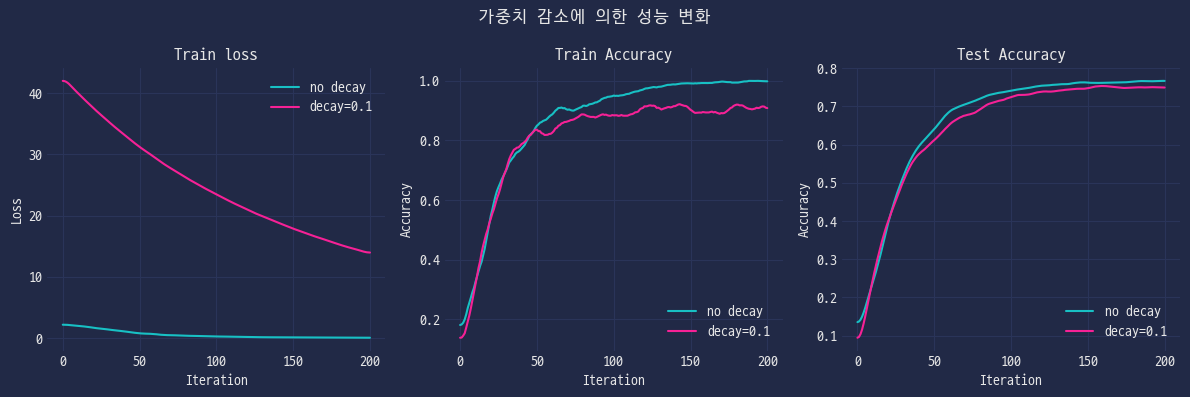

In [21]:
"""
3. 그래프
"""
x = np.arange(max_epoch)
train_loss = {decay_type: smooth_curve(train_loss[decay_type]) for decay_type in decays}
train_acc = {decay_type: smooth_curve(train_acc[decay_type]) for decay_type in decays}
test_acc = {decay_type: smooth_curve(test_acc[decay_type]) for decay_type in decays}

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for decay_type in decays:
    plt.plot(x, train_loss[decay_type],label=decay_type)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train loss')
plt.legend()

plt.subplot(1, 3, 2)
for decay_type in decays:
    plt.plot(x, train_acc[decay_type],label=decay_type)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
for decay_type in decays:
    plt.plot(x, test_acc[decay_type],label=decay_type)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.suptitle('가중치 감소에 의한 성능 변화')
plt.tight_layout()
plt.show()

### ⛓️‍💥 드롭아웃

In [31]:
"""
0. MNIST 데이터셋 불러오기
"""
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

train_size = x_train.shape[0]
batch_size = 100
max_epoch = 201
iter_per_epoch = max(int(train_size / batch_size + 0.5), 1)
max_iter = int(max_epoch * iter_per_epoch + 0.5)

"""
1. 실험용 설정
"""
dropout_rate = 0.1
dropout_configs = {f'dropout={dropout_rate}': True, 'no dropout': False}
optimizer = SGD()
networks = {}
train_loss = {}
train_acc = {}
test_acc = {}
for dropout_label, dropout in dropout_configs.items():
    networks[dropout_label] = MultiLayerNetExtend(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10, use_dropout=dropout, dropout_ration=dropout_rate
    )
    train_loss[dropout_label] = []
    train_acc[dropout_label] = []
    test_acc[dropout_label] = []


"""
2. 훈련
"""
for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for dropout_label in dropout_configs:
        grads = networks[dropout_label].gradient(x_batch, t_batch)
        optimizer.update(networks[dropout_label].params, grads)

    if i % iter_per_epoch == 0:
        clear_output()
        print(f'#{i} Iteration')
        for dropout_label in dropout_configs:
            loss = networks[dropout_label].loss(x_batch, t_batch)
            train_acc_ = networks[dropout_label].accuracy(x_batch, t_batch)
            test_acc_ = networks[dropout_label].accuracy(x_test, t_test)
            
            train_loss[dropout_label].append(loss)
            train_acc[dropout_label].append(train_acc_)
            test_acc[dropout_label].append(test_acc_)
            print(f'{dropout_label:11}: loss = {loss:.6f} | train acc: {train_acc_:.6f} | test acc: {test_acc_:.6f}')
        print()

#600 Iteration
dropout=0.1: loss = 0.322510 | train acc: 0.940000 | test acc: 0.753300
no dropout : loss = 0.059477 | train acc: 1.000000 | test acc: 0.781900



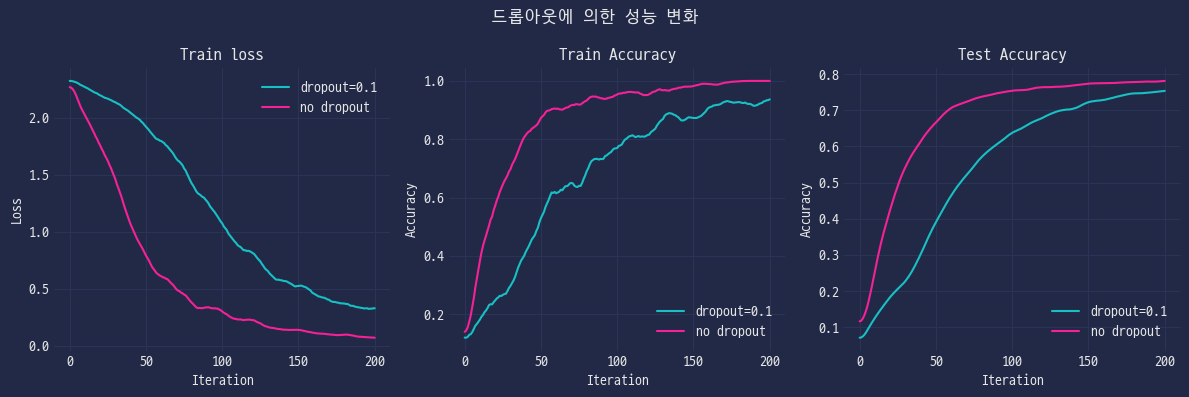

In [32]:
"""
3. 그래프
"""
x = np.arange(max_epoch)
train_loss = {dropout_label: smooth_curve(train_loss[dropout_label]) for dropout_label in dropout_configs}
train_acc = {dropout_label: smooth_curve(train_acc[dropout_label]) for dropout_label in dropout_configs}
test_acc = {dropout_label: smooth_curve(test_acc[dropout_label]) for dropout_label in dropout_configs}

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for dropout_label in dropout_configs:
    plt.plot(x, train_loss[dropout_label],label=dropout_label)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train loss')
plt.legend()

plt.subplot(1, 3, 2)
for dropout_label in dropout_configs:
    plt.plot(x, train_acc[dropout_label],label=dropout_label)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
for dropout_label in dropout_configs:
    plt.plot(x, test_acc[dropout_label],label=dropout_label)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.suptitle('드롭아웃에 의한 성능 변화')
plt.tight_layout()
plt.show()